In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize

from bidding_environment import SecondPriceAuction 
import pandas as pd
from clairvoyant_bidder import get_clairvoyant_truthful
from bidding_agent import MultiplicativePacingAgent

# Learning in Repeated Advertising Auctions

## One epoch

In [2]:
# advertisers' fixed parameters
## we assume that our agent has the FIRST index, e.g. our q_a*v_a = 0.56

n_advertisers = 4 # four advertisers, including myself
ctrs = np.ones(n_advertisers)
my_valuation = 0.8
B = 300

# environmental settings
n_users = 1000

# competitors
other_bids = np.random.uniform(0, 1, size = (n_advertisers-1, n_users)) # n_advertiser-1 cause one is my agent, that i don't have to consider in other
m_t = other_bids.max(axis=0)
## I'm considering competitors stronger than me, since they are free to exceed my budget

# In stochastic enviroment a greedy clairvoyant 
clairvoyant_bids, clairvoyant_utilities, clairvoyant_payments = get_clairvoyant_truthful(B, my_valuation, m_t, n_users)

eta = 1/np.sqrt(n_users) # from theory

agent = MultiplicativePacingAgent(valuation=my_valuation,
                                  budget=B,
                                  T=n_users, 
                                  eta=eta)

auction = SecondPriceAuction(ctrs)

utilities = np.array([])
my_bids = np.array([])
my_payments = np.array([])
total_wins = 0

np.random.seed(18)
for u in range(n_users):
    # interaction
    my_bid = agent.bid()
    bids = np.append(my_bid, other_bids[:, u].ravel())
    winners, payments_per_click = auction.round(bids=bids)
    my_win = int(winners==0)
    f_t, c_t = (my_valuation-m_t[u])*my_win, m_t[u]*my_win
    agent.update(f_t, c_t)
    # logging
    utilities = np.append(utilities, f_t)
    my_bids = np.append(my_bids, my_bid)
    my_payments = np.append(my_payments, c_t)
    total_wins+=my_win
print(f'Total # of Wins: {total_wins}')

Total # of Wins: 414


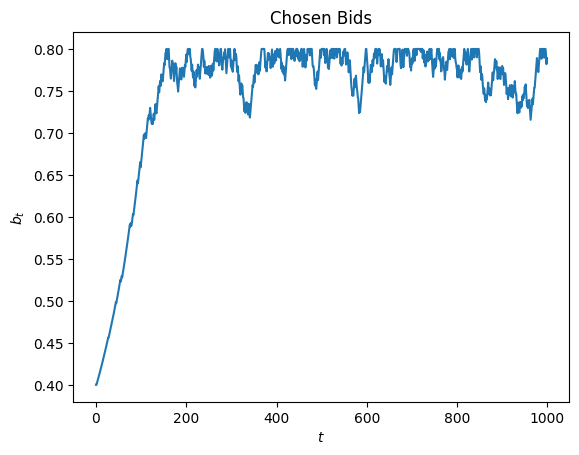

In [3]:
plt.plot(my_bids)
plt.xlabel('$t$')
plt.ylabel('$b_t$')
plt.title('Chosen Bids')
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\danie\AppData\Local\Temp\ipykernel_5132\4024054808.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sum c_t$')


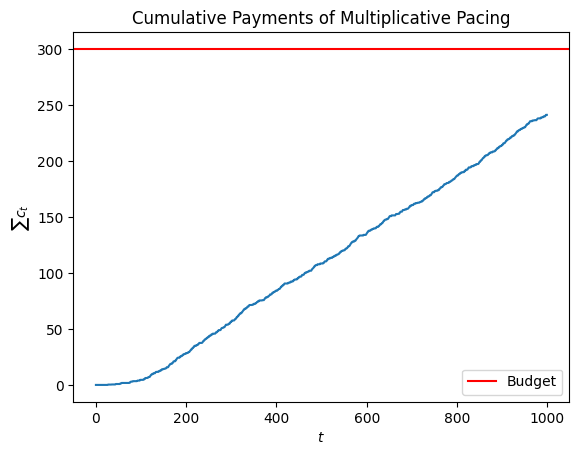

In [4]:
cumulative_payments = np.cumsum(my_payments)
plt.plot(cumulative_payments)
plt.xlabel('$t$')
plt.ylabel('$\sum c_t$')
plt.axhline(B, color='red', label='Budget')
plt.legend()
plt.title('Cumulative Payments of Multiplicative Pacing')
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\danie\AppData\Local\Temp\ipykernel_5132\1594796484.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sum f_t$')


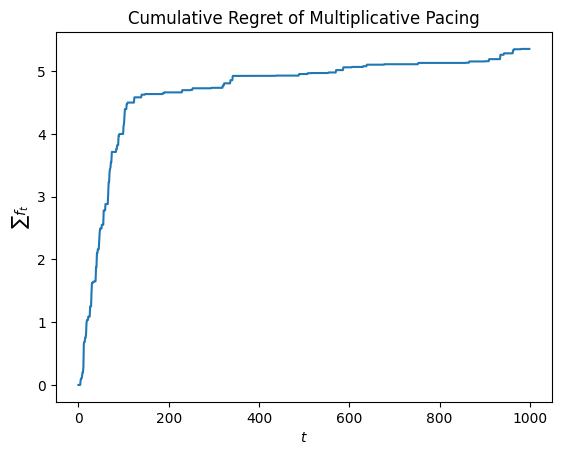

In [5]:
cumulative_regret = np.cumsum(clairvoyant_utilities-utilities)
plt.plot(cumulative_regret)
plt.xlabel('$t$')
plt.ylabel('$\sum f_t$')
plt.title('Cumulative Regret of Multiplicative Pacing')
plt.show()

## For multiple epochs

In [13]:
n_advertisers = 3
n_users = 5000
B = 300
my_valuation = 0.6
rho = B/n_users
eta = 1/np.sqrt(n_users)  #theorical learning rate to achieve sub linear regret
ctrs = np.ones(n_advertisers)

other_bids = np.random.uniform(0, 1, size = (n_advertisers-1, n_users)) # n_advertiser-1 cause one is my agent, that i don't have to consider in other
m_t = other_bids.max(axis=0)


n_epochs = 50
all_regrets = []
all_payments = []
for i in range(n_epochs):
    agent = MultiplicativePacingAgent(valuation=my_valuation,
                                    budget=B,
                                    T=n_users, 
                                    eta=eta)

    auction = SecondPriceAuction(ctrs)
    utilities = np.array([])
    my_bids = np.array([])
    my_payments = np.array([])

    clairvoyant_bids, clairvoyant_utilities, clairvoyant_payments = get_clairvoyant_truthful(B, my_valuation, m_t, n_users)   
    
    np.random.seed(i)
    for u in range(n_users):

        
        # interaction
        my_bid = agent.bid()
        bids = np.append(my_bid, other_bids[:, u].ravel())
        winners, payments_per_click = auction.round(bids=bids)
        my_win = int(winners==0)
        f_t, c_t = (my_valuation-m_t[u])*my_win, m_t[u]*my_win
        agent.update(f_t, c_t)
        # logging
        utilities = np.append(utilities, f_t)
        my_bids = np.append(my_bids, my_bid)
        my_payments = np.append(my_payments, c_t)
        
    all_regrets.append(np.cumsum(clairvoyant_utilities-utilities))
    all_payments.append(np.cumsum(my_payments))

avg_regret = np.array(all_regrets).mean(axis = 0)
std_regret  = np.array(all_regrets).std(axis = 0)


avg_payments = np.array(all_payments).mean(axis = 0)
std_payments = np.array(all_payments).std(axis = 0)

In [14]:
all_payments

[array([  0.        ,   0.        ,   0.        , ..., 256.17048113,
        256.17048113, 256.17048113]),
 array([  0.        ,   0.        ,   0.        , ..., 256.17048113,
        256.17048113, 256.17048113]),
 array([  0.        ,   0.        ,   0.        , ..., 256.17048113,
        256.17048113, 256.17048113]),
 array([  0.        ,   0.        ,   0.        , ..., 256.17048113,
        256.17048113, 256.17048113]),
 array([  0.        ,   0.        ,   0.        , ..., 256.17048113,
        256.17048113, 256.17048113]),
 array([  0.        ,   0.        ,   0.        , ..., 256.17048113,
        256.17048113, 256.17048113]),
 array([  0.        ,   0.        ,   0.        , ..., 256.17048113,
        256.17048113, 256.17048113]),
 array([  0.        ,   0.        ,   0.        , ..., 256.17048113,
        256.17048113, 256.17048113]),
 array([  0.        ,   0.        ,   0.        , ..., 256.17048113,
        256.17048113, 256.17048113]),
 array([  0.        ,   0.        ,  

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\danie\AppData\Local\Temp\ipykernel_5132\1117506322.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sum c_t$')


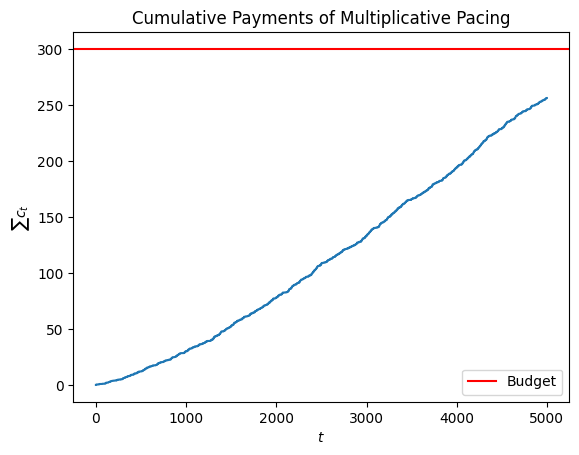

In [15]:
plt.plot(np.arange(n_users), avg_payments)
plt.fill_between(np.arange(n_users), avg_payments-std_payments, avg_payments+std_payments, alpha=0.3)
plt.xlabel('$t$')
plt.ylabel('$\sum c_t$')
plt.axhline(B, color='red', label='Budget')
plt.legend()
plt.title('Cumulative Payments of Multiplicative Pacing')
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\danie\AppData\Local\Temp\ipykernel_5132\2596992327.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sum R_t$')


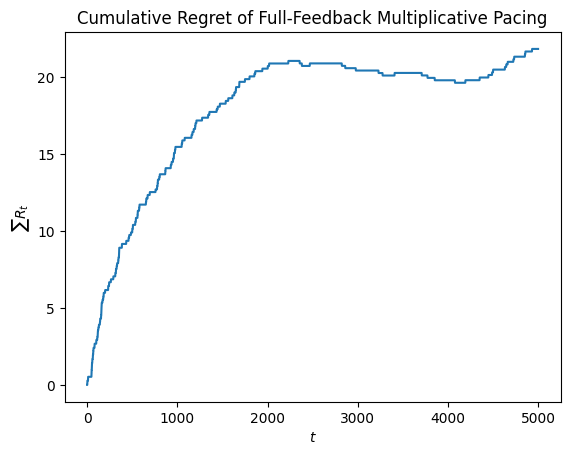

In [16]:
plt.plot(np.arange(n_users), avg_regret)
plt.fill_between(np.arange(n_users), avg_regret-std_regret, avg_regret+std_regret, alpha=0.3)
plt.xlabel('$t$')
plt.ylabel('$\sum R_t$')
plt.title('Cumulative Regret of Full-Feedback Multiplicative Pacing')
plt.show()